In [3]:
#Boat Safety#
#Setup#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import statsmodels.api as sm

In [4]:
#Loads Data#
VesselAccidents= pd.read_csv('/Users/Brett/Desktop/Vessel Type Accidents 2020.csv')
Factors= pd.read_csv('/Users/Brett/Desktop/2020 Factors for Accident.csv')
PersonalWaterCraft= pd.read_csv('/Users/Brett/Desktop/watercraft.csv')
AccidentType= pd.read_csv('/Users/Brett/Desktop/Accident Type Boating Datam2020.csv')
Accidents2001= pd.read_csv('/Users/Brett/Desktop/Data since 2001.csv')


In [41]:
#Prints Heads#
print(VesselAccidents)
print(Factors)
print(PersonalWaterCraft)
print(AccidentType)
print(Accidents2001)


          Type of Boat  Drownings  Other Deaths  Total Deaths  Total Injuries
0       Open Motorboat        260           116           376            1520
1  Personal Watercraft         19            47            66             896
2      Cabin Motorboat         16            17            33             298
3              Pontoon         53            14            67             232
4          Canoe/Kayak        131            23           154             117
                            Crash Reason  Accidents  Deaths  Injuries
0                            Alcohol Use        296     115       260
1                               Drug Use         12       8         2
2                        Excessive Speed        418      32       345
3                        Failure to Vent         54       5        89
4                       Improper Lookout        578      28       409
5   Inadqeuate Onboard Navigation Lights         21       0        16
6             Navigation Rules Violation  

In [42]:
#Looks at the detailed described information for each dataset# 
Accidents2001.describe()

,Year,Deaths,Injuries,Accidents
count,20.00000,20.000000,20.000000,20.000000
mean,2010.50000,679.800000,3190.600000,4771.750000
std,5.91608,53.818995,518.517766,612.881449
min,2001.00000,560.000000,2511.000000,4062.000000
25%,2005.75000,646.500000,2665.750000,4260.250000
50%,2010.50000,683.000000,3172.000000,4667.000000
75%,2015.25000,709.250000,3456.750000,5024.500000
max,2020.00000,767.000000,4274.000000,6419.000000


In [43]:
VesselAccidents.describe()

,Drownings,Other Deaths,Total Deaths,Total Injuries
count,5.00000,5.000000,5.000000,5.000000
mean,95.80000,43.400000,139.200000,612.600000
std,102.83336,42.606338,139.770168,590.156589
min,16.00000,14.000000,33.000000,117.000000
25%,19.00000,17.000000,66.000000,232.000000
50%,53.00000,23.000000,67.000000,298.000000
75%,131.00000,47.000000,154.000000,896.000000
max,260.00000,116.000000,376.000000,1520.000000


In [44]:
Factors.describe()

,Accidents,Deaths,Injuries
count,12.000000,12.000000,12.000000
mean,259.083333,27.833333,181.833333
std,255.614219,33.999554,160.859528
min,4.000000,0.000000,2.000000
25%,45.750000,4.250000,39.250000
50%,181.500000,17.000000,154.500000
75%,458.000000,37.750000,343.500000
max,664.000000,115.000000,409.000000


In [45]:
PersonalWaterCraft.dropna()
PersonalWaterCraft.describe()

,Year,Fatalities,Injured persons,Accidents,Sales,Number in use
count,33.00000,33.000000,33.000000,33.000000,32.000000,2.800000e+01
mean,2003.00000,48.151515,955.575758,1837.151515,82496.875000,9.265095e+05
std,9.66954,18.313453,455.549807,1064.888026,43173.808401,4.308375e+05
min,1987.00000,5.000000,156.000000,376.000000,29000.000000,9.275600e+04
25%,1995.00000,35.000000,624.000000,1062.000000,53175.000000,5.636362e+05
50%,2003.00000,46.000000,878.000000,1513.000000,76000.000000,1.190000e+06
75%,2011.00000,65.000000,1338.000000,2236.000000,84650.000000,1.232500e+06
max,2019.00000,84.000000,1837.000000,4099.000000,200000.000000,1.330000e+06


In [46]:
AccidentType.describe()

,Number of Accidents,Number of Deaths,Number of Injuries
count,5.000000,5.00000,5.000000
mean,665.800000,81.40000,352.800000
std,409.987439,61.40684,285.863954
min,335.000000,14.00000,128.000000
25%,484.000000,62.00000,161.000000
50%,542.000000,66.00000,255.000000
75%,589.000000,84.00000,389.000000
max,1379.000000,181.00000,831.000000


In [47]:
#Creates Regression Analysis for deaths since 2001. Provides outlook for the dat we are working with#

Accidents2001['LogDeaths']= np.log(Accidents2001).Deaths
X1 = Accidents2001.Year
X1 = sm.add_constant(X1)
y1 = Accidents2001.LogDeaths
mod = sm.OLS(y1,X1)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:              LogDeaths   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.564
Date:                Tue, 27 Jul 2021   Prob (F-statistic):              0.127
Time:                        17:54:47   Log-Likelihood:                 23.816
No. Observations:                  20   AIC:                            -43.63
Df Residuals:                      18   BIC:                            -41.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1978      6.045      2.680      0.0

Text(0.5, 1.0, 'Log Deaths Since 2001')

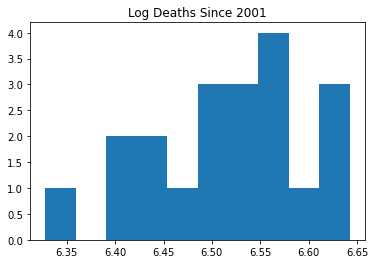

In [48]:
#Plots Histogram for above data#
plt.hist(y1, bins = 10)
plt.title('Log Deaths Since 2001')


Legend: Green is Accidents, Purple is Injuries, Gold is Deaths


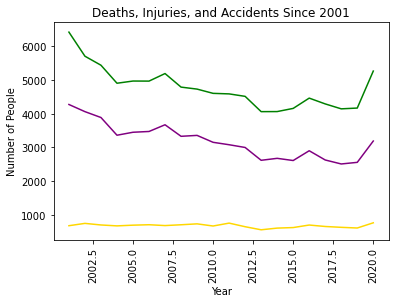

In [20]:
#Shows graph of data over the years#
x1= Accidents2001.Year
y2= Accidents2001.Deaths
y3=Accidents2001.Accidents
y4= Accidents2001['Injuries ']
plt.title('Deaths, Injuries, and Accidents Since 2001')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.plot(x1,y2, color= 'gold')
plt.plot(x1,y3, color= 'green')
plt.plot(x1,y4, color= 'purple')
print("Legend: Green is Accidents, Purple is Injuries, Gold is Deaths")

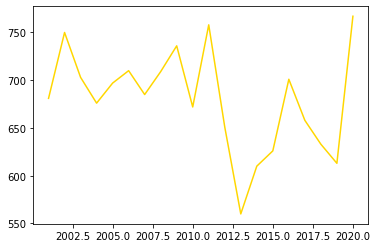

In [70]:
x1= Accidents2001.Year
y2= Accidents2001.Deaths
plt.plot(x1,y2, color= 'gold')

Text(0.5, 1.0, 'Deaths by Year Scatter')

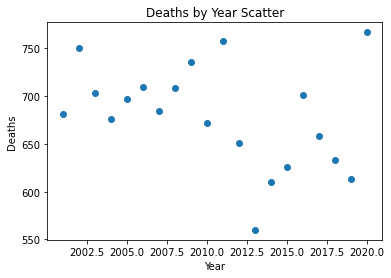

In [64]:
plt.scatter(x=Accidents2001['Year'], y=Accidents2001['Deaths'])
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Deaths by Year Scatter')

Text(0.5, 1.0, 'Injury by Year Scatter')

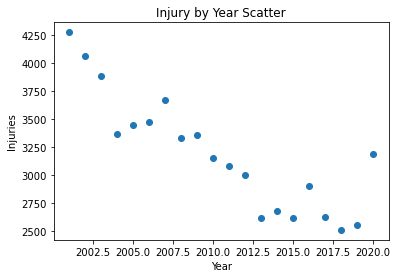

In [66]:
plt.scatter(x=Accidents2001['Year'], y=Accidents2001['Injuries '])
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Injury by Year Scatter')

Text(0.5, 1.0, 'Accidents by Year Scatter')

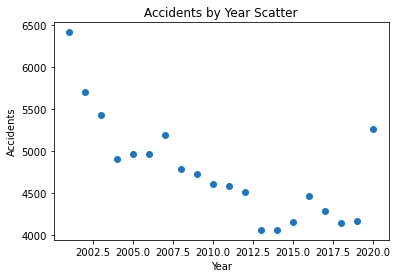

In [71]:
plt.scatter(x=Accidents2001['Year'], y=Accidents2001['Accidents'])
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('Accidents by Year Scatter')

In [50]:
#Personal Watercrafts#
PersonalWaterCraft['LogDeaths']= np.log(PersonalWaterCraft).Fatalities
X1 = PersonalWaterCraft.Year
X1 = sm.add_constant(X1)
y1 = PersonalWaterCraft.LogDeaths
mod = sm.OLS(y1,X1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              LogDeaths   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.893
Date:                Tue, 27 Jul 2021   Prob (F-statistic):             0.0574
Time:                        17:54:49   Log-Likelihood:                -23.742
No. Observations:                  33   AIC:                             51.48
Df Residuals:                      31   BIC:                             54.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.2673     18.771     -1.772      0.0

Text(0.5, 1.0, 'Log Deaths Since 1987')

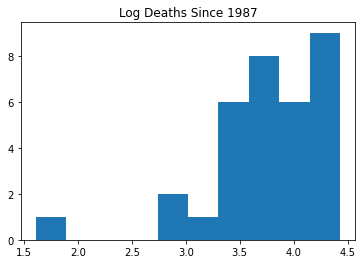

In [51]:
#Plots Histogram for above data#
plt.hist(y1, bins = 10)
plt.title('Log Deaths Since 1987')

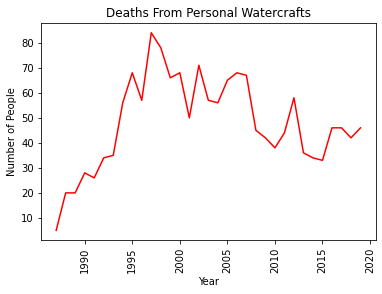

In [52]:
#Personal Watercraft Deaths#
x1= PersonalWaterCraft.Year
y2= PersonalWaterCraft.Fatalities
plt.title('Deaths From Personal Watercrafts')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.plot(x1,y2, color= 'red')


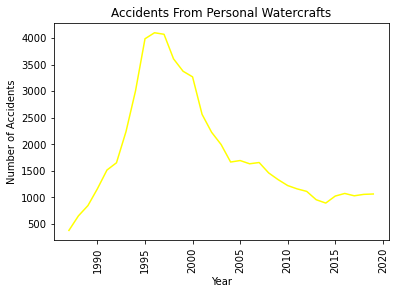

In [53]:
#Personal Watercraft Accidents#
x1= PersonalWaterCraft.Year
y2= PersonalWaterCraft.Accidents
plt.title('Accidents From Personal Watercrafts')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.plot(x1,y2, color= 'yellow')


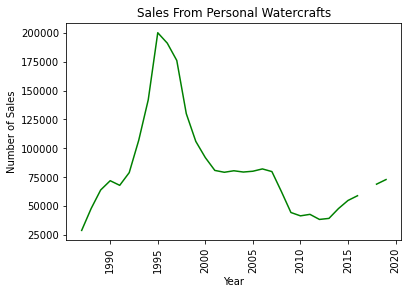

In [54]:
#Sales Personal Watercraft#
x1= PersonalWaterCraft.Year
y2= PersonalWaterCraft['Sales']
plt.title('Sales From Personal Watercrafts')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.plot(x1,y2, color= 'green')

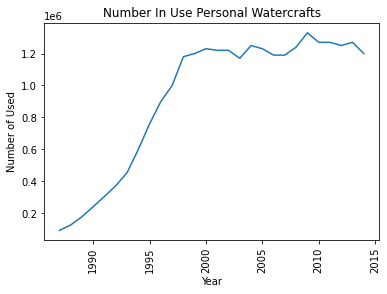

In [55]:
#In Use Personal Watercraft#
x= PersonalWaterCraft.Year
y= PersonalWaterCraft['Number in use']
plt.title('Number In Use Personal Watercrafts')
plt.xlabel('Year')
plt.ylabel('Number of Used')
plt.xticks(rotation=90)
plt.plot(x,y)

                            Crash Reason  Accidents  Deaths  Injuries
0                            Alcohol Use        296     115       260
1                               Drug Use         12       8         2
2                        Excessive Speed        418      32       345
3                        Failure to Vent         54       5        89
4                       Improper Lookout        578      28       409
5   Inadqeuate Onboard Navigation Lights         21       0        16
6             Navigation Rules Violation        316      26       220
7                   Operator Inattention        664      55       383
8                 Operator Inexperience         612      56       343
9                      Restricted Vision         67       2        47
10                            Sharp Turn         67       7        66
11                      Starting in Gear          4       0         2


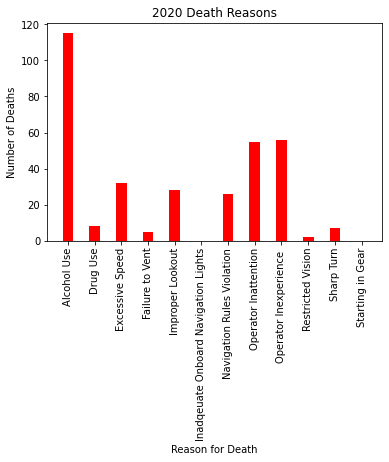

In [56]:
#2020 Reasons#
print(Factors)

plt.bar(Factors['Crash Reason'], Factors['Deaths'], color ='red',
        width = 0.4)
 
plt.xlabel("Reason for Death")
plt.ylabel("Number of Deaths")
plt.title("2020 Death Reasons")
plt.xticks(rotation=90)
plt.show()

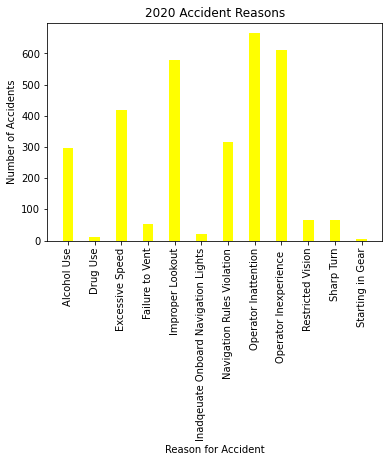

In [22]:
plt.bar(Factors['Crash Reason'], Factors['Accidents'], color ='yellow',
        width = 0.4)
 
plt.xlabel("Reason for Accident")
plt.ylabel("Number of Accidents")
plt.title("2020 Accident Reasons")
plt.xticks(rotation=90)
plt.show()

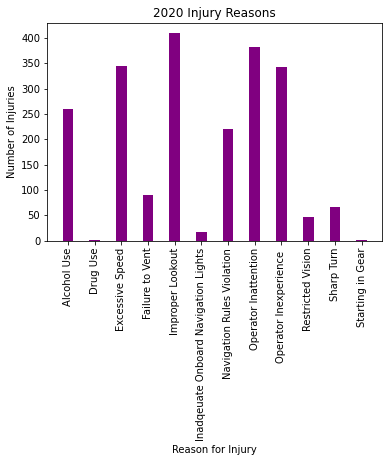

In [58]:
plt.bar(Factors['Crash Reason'], Factors['Injuries'], color ='purple',
        width = 0.4)
 
plt.xlabel("Reason for Injury")
plt.ylabel("Number of Injuries")
plt.title("2020 Injury Reasons")
plt.xticks(rotation=90)
plt.show()

                        Accident Type  Number of Accidents  Number of Deaths  \
0  Collision with recreational vessel                 1379                66   
1                   Flooding/Swamping                  589                84   
2         Collision with fixed object                  542                62   
3                           Grounding                  484                14   
4                     Falls overboard                  335               181   

   Number of Injuries  
0                 831  
1                 128  
2                 389  
3                 255  
4                 161  


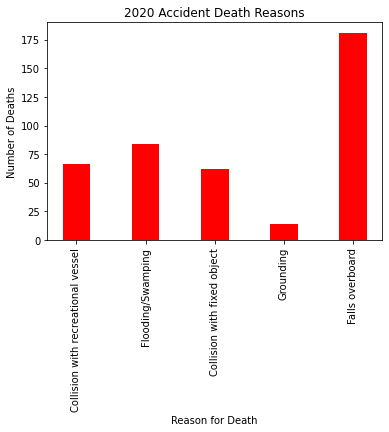

In [59]:
#Type of Accidents that occurred in 2020#
print(AccidentType)

plt.bar(AccidentType['Accident Type'], AccidentType['Number of Deaths'], color ='red',
        width = 0.4)
 
plt.xlabel("Reason for Death")
plt.ylabel("Number of Deaths")
plt.title("2020 Accident Death Reasons")
plt.xticks(rotation=90)
plt.show()

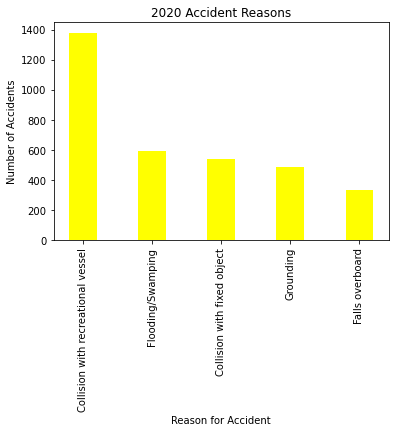

In [60]:
plt.bar(AccidentType['Accident Type'], AccidentType['Number of Accidents'], color ='yellow',
        width = 0.4)
 
plt.xlabel("Reason for Accident")
plt.ylabel("Number of Accidents")
plt.title("2020 Accident Reasons")
plt.xticks(rotation=90)
plt.show()

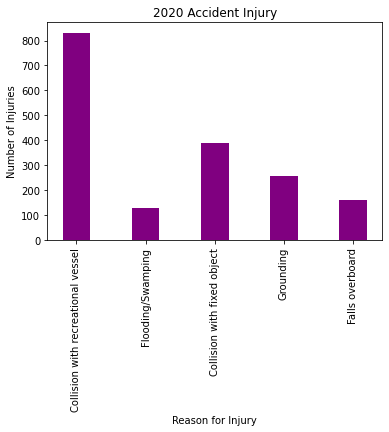

In [61]:
plt.bar(AccidentType['Accident Type'], AccidentType['Number of Injuries'], color ='purple',
        width = 0.4)
 
plt.xlabel("Reason for Injury")
plt.ylabel("Number of Injuries")
plt.title("2020 Accident Injury")
plt.xticks(rotation=90)
plt.show()

          Type of Boat  Drownings  Other Deaths  Total Deaths  Total Injuries
0       Open Motorboat        260           116           376            1520
1  Personal Watercraft         19            47            66             896
2      Cabin Motorboat         16            17            33             298
3              Pontoon         53            14            67             232
4          Canoe/Kayak        131            23           154             117


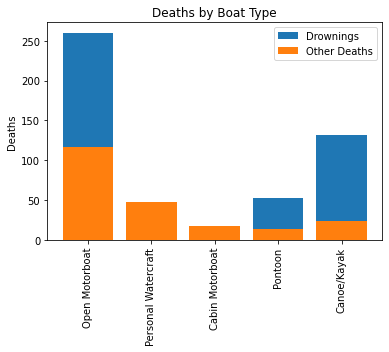

In [63]:
#Vessel of Accidents that occurred in 2020#
print(VesselAccidents)
fig, ax = plt.subplots()

ax.bar(VesselAccidents['Type of Boat'], VesselAccidents['Drownings'], label='Drownings')
ax.bar(VesselAccidents['Type of Boat'], VesselAccidents['Other Deaths'], label='Other Deaths')

ax.set_ylabel('Deaths')
ax.set_title('Deaths by Boat Type')
ax.legend()
plt.xticks(rotation=90)

plt.show()